# Actividades de clase, semanas 4, 5 y 6.

# $Grupo\ 10$  $[VISION ARTIFICIAL\ 2019 - 02]$

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

### [Mod I - 1. Solución]

Text(0.5,1,'Rotación y reflexión')

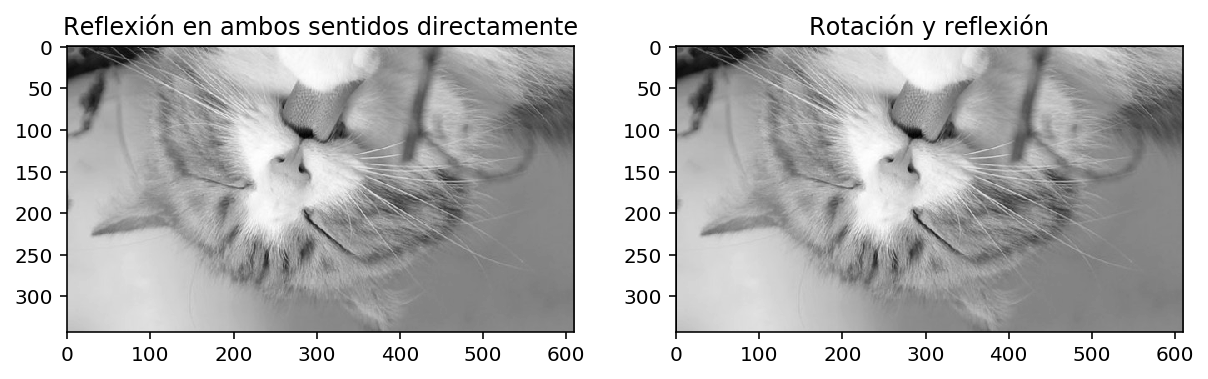

In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Refleión directa
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
filas,columnas = img.shape

matriz_afin_ref_xy = np.float32([[1,0,0]
                                ,[0,-1,filas]])

ref_xy = cv2.warpAffine(img,matriz_afin_ref_xy,(columnas,filas))

fig = plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(ref_xy,cmap='gray')
plt.title("Reflexión en ambos sentidos directamente");

#Reflexión con giro

matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])

theta = 180

rotation_center = ((columnas/2,filas/2))

matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))
plt.subplot(1,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Rotación y reflexión")


#### Para obtener el resultado usando solo la reflexión se debe reflejar en ambos ejes. En el segundo caso se hace una rotación inicial de 180°, para que la imagen que de reves, y por ultimo se aplica una reflexión 

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

### [Mod  2. Solución]

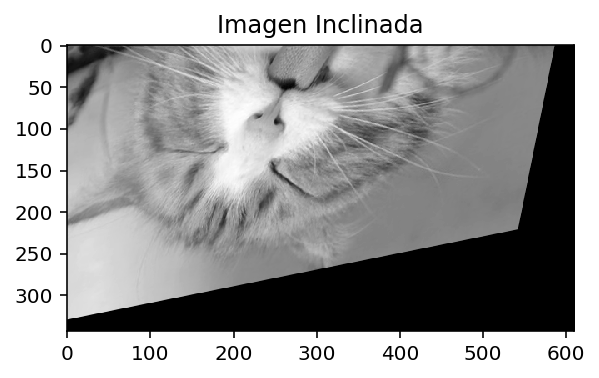

In [3]:
img = ref_x
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])
res = cv2.warpAffine(img,matriz_afin,(columnas,filas))
fig = plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')
plt.title("Imagen Inclinada");

#### Para lograr que la imagen se vea inclinada es necesario modificar la matriz de transformación en las pocisiones (0,1), para la inclinación en **x**,  y (1,1), para la inclinación en **y**. En esta caso ambas son

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

### [ 3. Solución]

#### [3.1 Aplicación de máscara y rotación]

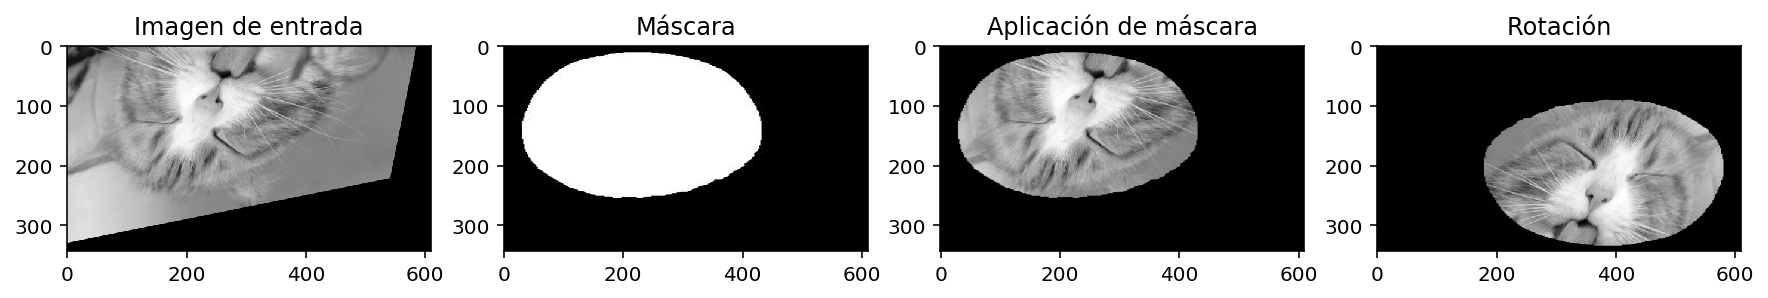

In [9]:

img = res
mask = cv2.imread("res/mascara2.png", cv2.IMREAD_GRAYSCALE)

mask = mask / 255
#Ajustar el tamaño de la máscara al de la img
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
#Aplicamos la operación AND para que la imagen del 
#gato solo se sea en la parte blanca de la mascara
salida = img * mask
salida = salida.astype(np.uint8)

#ahora se va a rotar la imagen resultante 180° para que el gato quee de frente
img = salida
filas,columnas = img.shape
theta = 180
rotation_center = ((columnas/2,filas/2))
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Aplicación de máscara')
ax4.set_title("Rotación")
ax1.imshow(res, cmap='gray')
ax2.imshow(mask, cmap='gray')
ax3.imshow(salida, cmap='gray')
ax4.imshow(rot, cmap= "gray")


#### [ 3.2 Rotación y aplicación de máscara ]

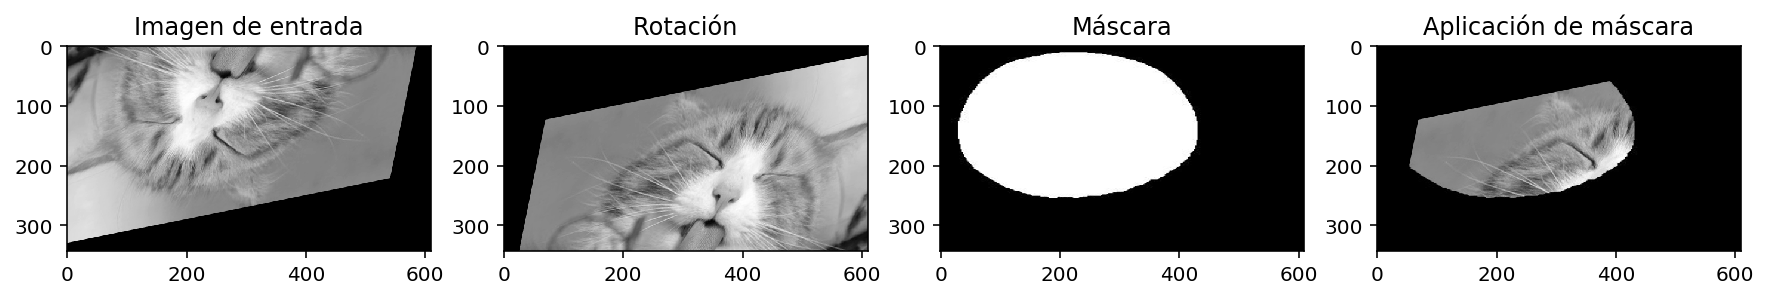

In [8]:
#Se va a rotar la imagen resultante 180° para que el gato quede de frente
img = res
filas,columnas = img.shape
theta = 180
rotation_center = ((columnas/2,filas/2))
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Aplicación de máscara
img = rot
mask = cv2.imread("res/mascara2.png", cv2.IMREAD_GRAYSCALE)
mask = mask / 255
#Ajustar el tamaño de la máscara al de la img
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
#Aplicamos la operación AND para que la imagen del 
#gato solo se sea en la parte blanca de la mascara
salida = img * mask
salida = salida.astype(np.uint8)




fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Rotación')
ax3.set_title('Máscara')
ax4.set_title("Aplicación de máscara")
ax1.imshow(res, cmap='gray')
ax2.imshow(rot, cmap='gray')
ax3.imshow(mask, cmap='gray')
ax4.imshow(salida, cmap= "gray")


####  Los resultados **No** son iguales. Esto se debe a que la rotación solo se le aplica a la imagen, pero la máscara permanece estática. En conclusión, si se debe obtener el mismo resultado anterior, se debe rotar tanto máscara como imagen, de lo contrario, los pixeles que se van a mostrar al aplicar la máscara estarán en la misma posición, independientemente de las transformaciones que se le apliquen a la imagen a transformar.

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

#### [ 1. Solución]

Text(0.5,1,'Exp a: 0.5, b: 0.5, c: -1')

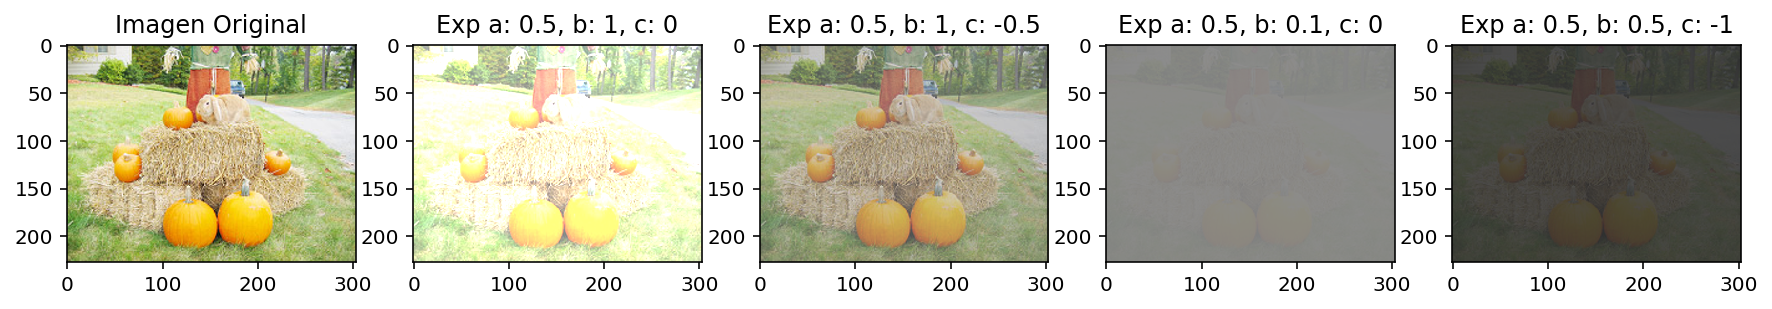

In [33]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Se define una función que va a aplicar las transformaciones a cada canal de una imagen RGB

def apply_f_on_rgb(img, f, args):
    """
    Función para aplicar una transformación a la imagen
    ----
    Parameters:
        img: imagen a la que le aplicaremos la transformación \n
        f: vble tipo función \n
        args: otros argumentos
    """
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

# Se crea la función de transformación de función exponencial a * exp( bx + c)

def non_linear_exp(img, a, b, c):
    """a * exp( bx + c)"""
    import numpy as np
    
    img_copy = img.astype(np.float32) / 255.0
    
    #bx
    res_bx = cv2.multiply(b , img_copy)
    # +c
    res_c = cv2.add ( res_bx , c)
    # exp
    res_exp = cv2.exp(res_c)
    # a *
    res_a = cv2.multiply ( a, res_exp)
    
    res = res_a * 255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    return res

#Leemos la imagen
img = cv2.imread("res/calabazas.png", cv2.IMREAD_COLOR) 
# Convertir imagen a espacio RGB (o BGR2LBA para espacio de color LBA)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Aplicamos transformación exponencial a * exp( bx + c)
a1 = 0.5
b1 = 1
c1 = 0
img_exp1 = apply_f_on_rgb(img_rgb, non_linear_exp, [a1, b1, c1])
a2 = 0.5
b2 = 1
c2 = -0.5
img_exp2 = apply_f_on_rgb(img_rgb, non_linear_exp, [a2, b2, c2])
a3 = 0.5
b3 = 0.1
c3 = 0
img_exp3 = apply_f_on_rgb(img_rgb, non_linear_exp, [a3, b3, c3])
a4 = 0.5
b4 = 0.5
c4 = -1
img_exp4 = apply_f_on_rgb(img_rgb, non_linear_exp, [a4, b4, c4])

fig, ((ax1, ax2, ax3, ax4,ax5)) = plt.subplots(1,5,figsize = (15, 15))
ax1.imshow(img_rgb)
ax2.imshow(img_exp1)
ax3.imshow(img_exp2)
ax4.imshow(img_exp3)
ax5.imshow(img_exp4)

ax1.set_title("Imagen Original")
ax2.set_title("Exp a: %s, b: %s, c: %s"%(a1,b1,c1))
ax3.set_title("Exp a: %s, b: %s, c: %s"%(a2,b2,c2))
ax4.set_title("Exp a: %s, b: %s, c: %s"%(a3,b3,c3))
ax5.set_title("Exp a: %s, b: %s, c: %s"%(a4,b4,c4))


#### Como observamos en el anterior arreglo de imágenes, aplicar la función exponencial siempre resulta en una **disminución del contraste de la imagen**. 

#### El parámetro "a" controla lo que sería la intensidad global de la imagen escalando todos los valores con un número.

#### El parámetro "b" tiene fuerte impacto en el contraste de la imagen, en donde entre más cercano a 0 sea el valor, menos contrastado estará y se obtendrá un valor cercano al gris neutro. 

#### El parámetro "c" afecta el histograma moviendolo hacia la derecha o izquierda inicialmente, antes de aplicar la transformación exponencial

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

#### [Mod II - 2. Solución]

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.style.use(["dark_background", "presentation"])
def apply_f_on_rgb(img, f, args):
    """
    Función para aplicar una transformación a la imagen
    ----
    Parameters:
        img: imagen a la que le aplicaremos la transformación \n
        f: vble tipo función \n
        args: otros argumentos
    """
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res


def exp_equalization(img, alpha):
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]  #Probabilidad acumulada del histograma
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = -gmin - (1/alpha)*np.log(1-cdf[g] + 1e-8)*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

def rayl_equalization(img, alpha):
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed= True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]  #Probabilidad acumulada del histograma
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        j = -2 * (alpha**2) * np.log(1-cdf[g]+ 1e-8)
        res[img == g] = gmin - np.sqrt(np.abs(j)) * (gmax - gmin)
    
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leemos la imagen
img = cv2.imread("res/eiffel.png", cv2.IMREAD_COLOR) 
# Convertir imagen a espacio RGB (o BGR2LBA para espacio de color LBA)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

alpha1 = 0.5
alpha2 = 1
img_exp_equ = apply_f_on_rgb(img_rgb, exp_equalization,[alpha1])
img_exp_ray = apply_f_on_rgb(img_rgb, rayl_equalization,[alpha2])

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,50))
plt.subplots_adjust(wspace = 1)
ax1.imshow(img_rgb)
ax2.imshow(img_exp_equ)
ax3.imshow(img_exp_ray)

ax1.set_title("Imagen Original")
ax2.set_title("Ecualización exponencial, alpha = %s"%(alpha1))
ax3.set_title("Ecualización de Rayleigh, alpha = %s"%(alpha2))

OSError: 'presentation' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

### [ Módulo II - 3. Solución]

Text(0.5,1,'alpha = 1 , gamma = 2')

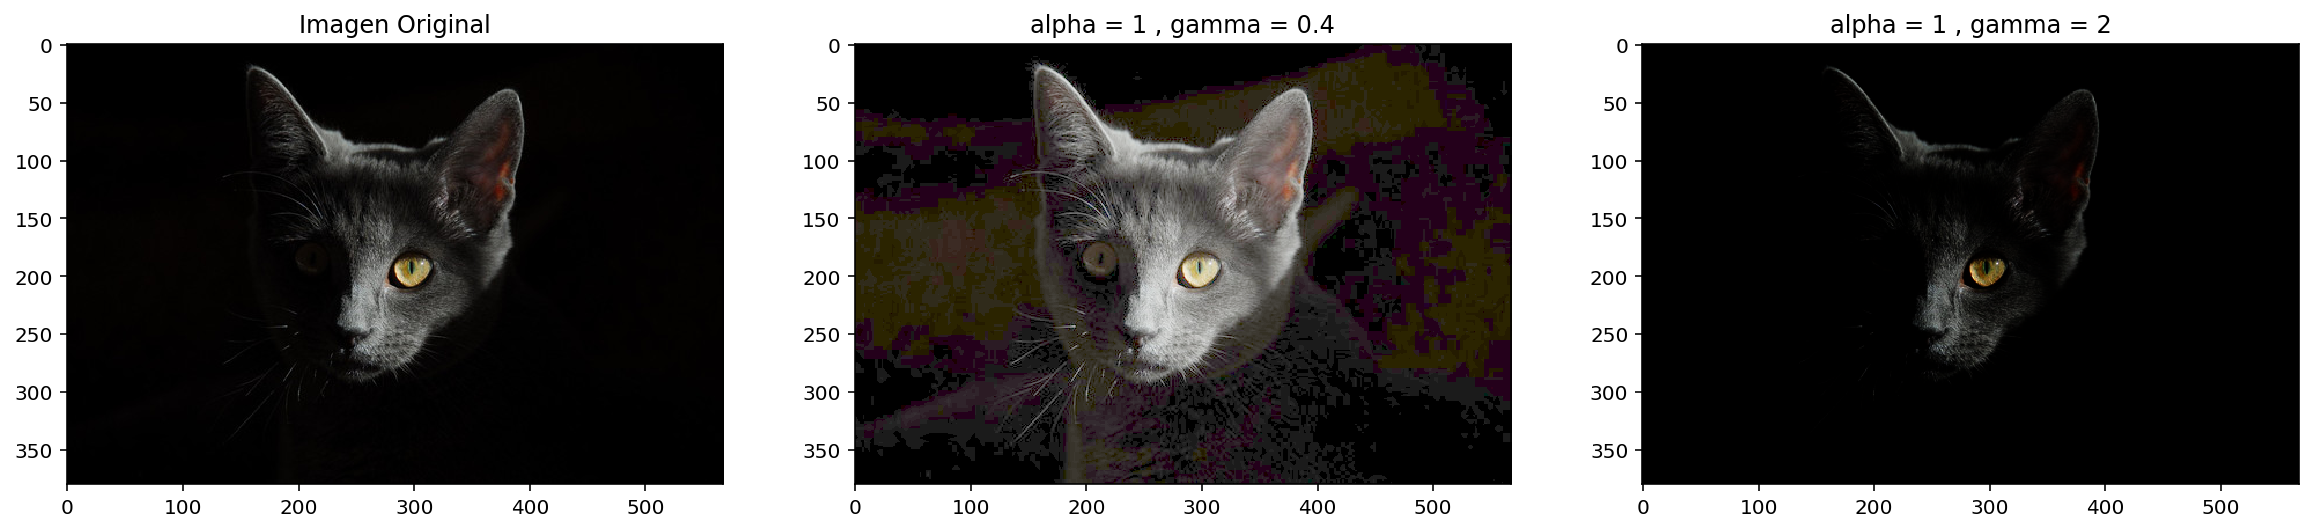

In [76]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

def apply_f_on_rgb(img, f, args):
    """
    Función para aplicar una transformación a la imagen
    ----
    Parameters:
        img: imagen a la que le aplicaremos la transformación \n
        f: vble tipo función \n
        args: otros argumentos
    """
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res


#Leemos la imagen
img = cv2.imread("res/gatonegro.jpg", cv2.IMREAD_COLOR) 
# Convertir imagen a espacio RGB (o BGR2LBA para espacio de color LBA)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

a1 = 1
gamma1 = 0.4
img_gamma1 = apply_f_on_rgb(img_rgb,gamma_correction,[a1,gamma1])

a2 = 1
gamma2 = 2
img_gamma2 = apply_f_on_rgb(img_rgb,gamma_correction,[a2,gamma2])


fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,50))
#plt.subplots_adjust(wspace = 1)
ax1.imshow(img_rgb)
ax2.imshow(img_gamma1)
ax3.imshow(img_gamma2)

ax1.set_title("Imagen Original")
ax2.set_title("alpha = %s , gamma = %s"%(a1, gamma1))
ax3.set_title("alpha = %s , gamma = %s"%(a2, gamma2))


#### De acuerdo a las gráficas mostradas en el enunciado, y a los resultados obtenidos se nota que, con un 0 < gamma < 1, los valores de intensidad meidos - bajos se van aumentando pero siempre manteniendo los valores extremos. 

#### Para gamma > 1 , se van oscureciendo los valores de intensidad medios - altos, pero siempre manteniendo los extremos estáticos. 

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

### [ Módulo III - 1. Solución]

Text(0.5,1,'Convolución aplicada')

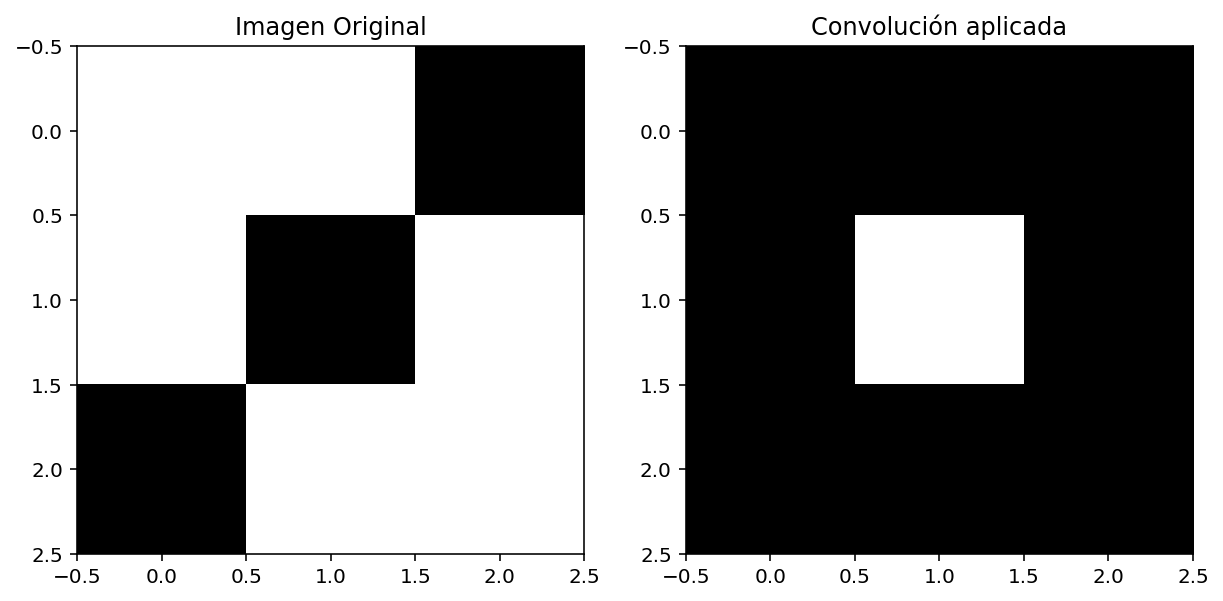

In [23]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

I = np.array ([[255 , 255, 0],[255, 0 , 255],[0 ,255 , 255]])

mask =np.zeros((3,3))+1/2 


def convolucion (img, mask, ampliar = False):
    """ Aplicacion de una convolución -Manu"""
        
    if mask.shape[0] % 2 == 0 or mask.shape[1] % 2 == 0:
        res = "La máscara debe tener número impar de filas y columnas"
        print ("La máscara debe tener número impar de filas y columnas")
        return res
    else:
        cent_filas = int(mask.shape[0] / 2 - 0.5) #Indice de la fila central
        cent_cols = int( mask.shape[1] / 2 - 0.5) #Índice de la columna central
        
      
        if ampliar:
            zeros_filas = np.zeros((cent_filas, img.shape[1]))
            
            img = np.concatenate((zeros_filas, img), axis = 0)
            img = np.concatenate((img, zeros_filas), axis = 0)
            
            zeros_cols = np.zeros((img.shape[0],cent_cols))
            img = np.concatenate((zeros_cols,img),axis = 1)
            img = np.concatenate((img,zeros_cols), axis = 1)
        
        res = np.zeros((img.shape))
        
        # i , j -> filas y columnas en donde se va guardar el dato de la convolución
        for j in range ( cent_cols, img.shape[1] - cent_cols):
            for i in range ( cent_filas, img.shape[0] - cent_filas):
              
                # f , c indice de donde se empezará la sub matriz de img ( se resta el inidce de la mitad, al indice donde se guarda el resultado)
                f = i - cent_filas
                c = j - cent_cols
                
                img_i = img[ f: mask.shape[0] + f , c : mask.shape[1] + c]
                img_conv = img_i * mask
                
                res[ i, j] = np.sum(img_conv)
    return res

res = convolucion(I, mask)

fig, ((ax1,ax2)) = plt.subplots(1,2, figsize= (10,15))
ax1.imshow(I,cmap = "gray")
ax2.imshow(res, cmap = "gray")

ax1.set_title("Imagen Original")
ax2.set_title("Convolución aplicada")

    